In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
brun_data = pd.read_csv('/Users/j.y.j/Desktop/628/2/brun_review.csv')

In [3]:
brun_data.head()

,Unnamed: 0,business_id,date,stars,text
0,0,40775,12/15/2017 23:27,1,walk around friday afternoon . sat table bar w...
1,1,64416,7/25/2016 3:57,5,pick meat planet chef make mexican style dish ...
2,2,145384,5/28/2018 20:56,5,party order fish taco . pork belly banh mi . c...
3,3,24675,9/20/2017 15:23,5,flat fantastic ! twice croissant bomb . ca not...
4,4,69773,4/30/2017 4:13,2,employee busy chat . one employee his head dri...


In [4]:
brun=brun_data.drop(['Unnamed: 0'], axis=1)

In [5]:
brun.head()

,business_id,date,stars,text
0,40775,12/15/2017 23:27,1,walk around friday afternoon . sat table bar w...
1,64416,7/25/2016 3:57,5,pick meat planet chef make mexican style dish ...
2,145384,5/28/2018 20:56,5,party order fish taco . pork belly banh mi . c...
3,24675,9/20/2017 15:23,5,flat fantastic ! twice croissant bomb . ca not...
4,69773,4/30/2017 4:13,2,employee busy chat . one employee his head dri...


In [16]:
# filtering out each star reviews
neg_phrases=brun[brun.stars == 1]
neg_words = []
for t in neg_phrases.text:
    neg_words.append(t)
neg_words[:4]

['walk around friday afternoon . sat table bar walk min . not even_NEG think_NEG they_NEG realized_NEG walked_NEG . however everyone bar notice walked !!! service non existent best . not good_NEG way_NEG new_NEG business_NEG start_NEG . oh well . location they different thing past several year . they add list . smdh !!!',
 'no idea_NEG owner_NEG problem_NEG . he incredibly rude . his wife . hand super nice odd mix . great space . rude owner coffee average .',
 'location excellent restaurant beautiful . food awful server rude impolite . group people whatever ordered worse another one ! even little daughter love french fry could not eat_NEG them_NEG they_NEG not_NEG fresh_NEG she_NEG thought_NEG they_NEG artificial_NEG !!!_NEG',
 'e mail head office month ago lousy experience their yonge college street location never received_NEG response_NEG . never huge_NEG fan_NEG begin_NEG confirmed_NEG things_NEG . oh . cobb salad not chicken_NEG anymore_NEG ..._NEG rip_NEG !']

In [17]:
neg_text = pd.Series(neg_words).str.cat(sep=' ')
neg_text[:100]

'walk around friday afternoon . sat table bar walk min . not even_NEG think_NEG they_NEG realized_NEG'

In [19]:
for t in neg_phrases.text[:300]:
    if 'good' in t:
        print(t)

walk around friday afternoon . sat table bar walk min . not even_NEG think_NEG they_NEG realized_NEG walked_NEG . however everyone bar notice walked !!! service non existent best . not good_NEG way_NEG new_NEG business_NEG start_NEG . oh well . location they different thing past several year . they add list . smdh !!!
no stars_NEG . . yes no stars_NEG ..._NEG app_NEG made_NEG select_NEG one_NEG post_NEG complete_NEG bs_NEG witnessed_NEG customer_NEG left_NEG real_NEG stale_NEG taste_NEG mouth_NEG . first dine experience stale taste not caused_NEG food_NEG . go family location lunch . place busy exactly good store manager would want however good store manager would also want their customer leave location feeling respect . value . fully satisfy their dine experience . experience start great slowly show sign head hill burger come table salad shake . usually frequent parmatown location . they seem much professional . shake deliver table chocolate shake make table strawberry banana shake po

In [21]:
pos_phrases = brun[brun.stars == 5] 
pos_string = []
for t in pos_phrases.text:
    pos_string.append(t)
pos_text = pd.Series(pos_string).str.cat(sep=' ')
pos_text[:100]

'pick meat planet chef make mexican style dish amaze flavor ! wow . fish lamb taco die . drink great '

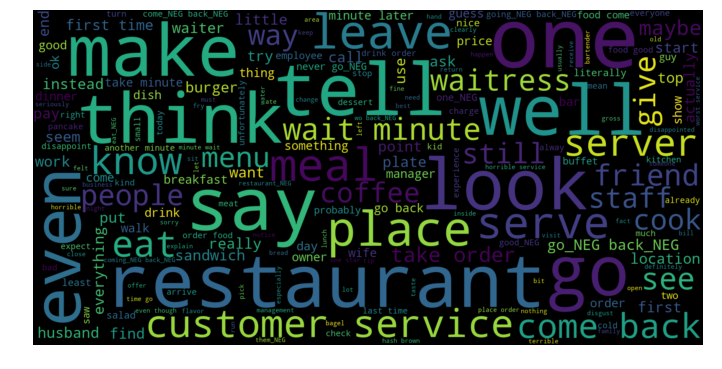

In [23]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

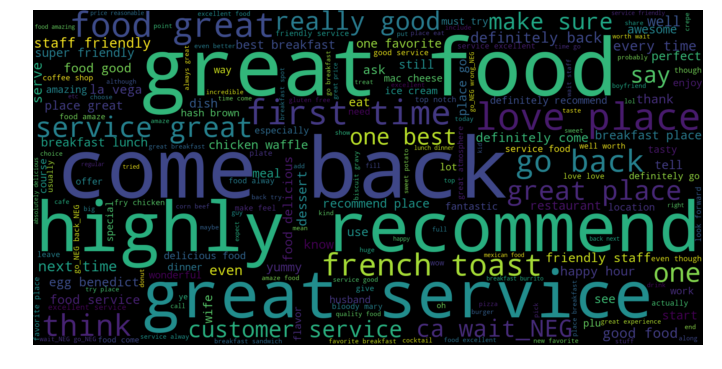

In [24]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
sum(brun.text.isna())

32

In [27]:
brun[brun.text.isna()]='na'

In [28]:
sum(brun.text.isna())

0

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cvector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,2))
cvector.fit(brun.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
        ngram_range=(1, 2), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [30]:
len(cvector.get_feature_names())

5704128

In [31]:
one_matrix = cvector.transform(brun[brun.stars == 1].text)

In [32]:
two_matrix = cvector.transform(brun[brun.stars == 2].text)

In [33]:
three_matrix = cvector.transform(brun[brun.stars == 3].text)

In [34]:
four_matrix = cvector.transform(brun[brun.stars == 4].text)

In [35]:
five_matrix = cvector.transform(brun[brun.stars == 5].text)

In [37]:
one_words = one_matrix.sum(axis=0)

In [38]:
one_words_freq = [(word, one_words[0, idx]) for word, idx in cvector.vocabulary_.items()]

In [39]:
one_tf = pd.DataFrame(list(sorted(one_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','one'])

In [41]:
one_tf[:10]

,Terms,one
0,not,101964
1,they,44296
2,food,43764
3,order,34059
4,get,33005
5,go,29743
6,she,25725
7,place,25031
8,no,24507
9,come,24345


In [43]:
one_tf_df = one_tf.set_index('Terms')

In [44]:
two_words = two_matrix.sum(axis=0)
two_words_freq = [(word, two_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
two_tf = pd.DataFrame(list(sorted(two_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','two'])
two_tf_df = two_tf.set_index('Terms')

In [45]:
two_tf_df.head()

,two
Terms,
not,102444
food,44135
they,40262
order,29817
get,29117


In [55]:
three_words = three_matrix.sum(axis=0)
three_words_freq = [(word, three_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
three_tf = pd.DataFrame(list(sorted(three_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','three'])
three_tf_df = three_tf.set_index('Terms')

In [56]:
four_words = four_matrix.sum(axis=0)
four_words_freq = [(word, four_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
four_tf = pd.DataFrame(list(sorted(four_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','four'])
four_tf_df = four_tf.set_index('Terms')

In [57]:
five_words = five_matrix.sum(axis=0)
five_words_freq = [(word, five_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
five_tf = pd.DataFrame(list(sorted(five_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','five'])
five_tf_df = five_tf.set_index('Terms')

In [58]:
term_freq_df = pd.concat([one_tf_df, two_tf_df, three_tf_df, four_tf_df, five_tf_df],axis=1)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [59]:
term_freq_df['total'] = term_freq_df['one'] + term_freq_df['two'] + term_freq_df['three'] + term_freq_df['four']  +  term_freq_df['five'] 

In [91]:
t=term_freq_df.sort_values(by='total', ascending=False).head(100)

In [95]:
df=term_freq_df.sort_values(by='total', ascending=False)

In [96]:
df.to_csv('wordfre.csv',header=True)

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',min_df = 0.0, max_df = 1.0, ngram_range=(1,3))
cvec.fit(brun.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [104]:
one_matrix = cvec.transform(brun[brun.stars== 1].text)
two_matrix = cvec.transform(brun[brun.stars == 2].text)
three_matrix = cvec.transform(brun[brun.stars== 3].text)
four_matrix = cvec.transform(brun[brun.stars == 4].text)
five_matrix = cvec.transform(brun[brun.stars == 5].text)

In [105]:
one_words = one_matrix.sum(axis=0)
one_words_freq = [(word, one_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
one_tf = pd.DataFrame(list(sorted(one_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','one'])
one_tf_df = one_tf.set_index('Terms')

In [100]:
one_matrix

<51161x156470 sparse matrix of type '<class 'numpy.int64'>'
	with 2302212 stored elements in Compressed Sparse Row format>

In [101]:
two_matrix

<45763x156470 sparse matrix of type '<class 'numpy.int64'>'
	with 2273132 stored elements in Compressed Sparse Row format>

In [106]:
two_words = two_matrix.sum(axis=0)
two_words_freq = [(word, two_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
two_tf = pd.DataFrame(list(sorted(two_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','two'])
two_tf_df = two_tf.set_index('Terms')

In [107]:
three_words = three_matrix.sum(axis=0)
three_words_freq = [(word, three_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
three_tf = pd.DataFrame(list(sorted(three_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','three'])
three_tf_df = three_tf.set_index('Terms')

In [108]:
four_words = four_matrix.sum(axis=0)
four_words_freq = [(word, four_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
four_tf = pd.DataFrame(list(sorted(four_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','four'])
four_tf_df = four_tf.set_index('Terms')

In [109]:
five_words = five_matrix.sum(axis=0)
five_words_freq = [(word, five_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
five_tf = pd.DataFrame(list(sorted(five_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','five'])
five_tf_df = five_tf.set_index('Terms')

In [110]:
term_freq_df = pd.concat([one_tf_df, two_tf_df, three_tf_df, four_tf_df, five_tf_df],axis=1)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [111]:
term_freq_df['total'] = term_freq_df['one'] + term_freq_df['two'] + term_freq_df['three'] + term_freq_df['four']  +  term_freq_df['five'] 

In [112]:
t=term_freq_df.sort_values(by='total', ascending=False).head(100)